<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/Consumer_complaints_multi_Class_classifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
col_list =['product','consumer_complaint_narrative']

In [3]:
data = pd.read_csv('/content/drive/MyDrive/datasets/Clean_Complaint_new1.csv', usecols=col_list)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 0 to 99996
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   product                       99997 non-null  object
 1   consumer_complaint_narrative  99995 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [5]:
data.head()

,product,consumer_complaint_narrative
0,Student loan,years account poorly managed forced take defer...
1,Debt collection,citi management problem contacted stating situ...
2,"Credit reporting, credit repair services, or o...",promised several representatives ally financia...
3,"Credit reporting, credit repair services, or o...",equifax mishandled information led breach puts...
4,Bank account or service,false charge bank charged overdraft charges ac...


In [6]:
data.shape

(99997, 2)

In [7]:
data[['product']].value_counts()

product                                                                     
Credit reporting, credit repair services, or other personal consumer reports    32576
Debt collection                                                                 22633
Mortgage                                                                        13712
Credit card or prepaid card                                                     10949
Student loan                                                                     5602
Bank account or service                                                          3795
Checking or savings account                                                      3346
Consumer Loan                                                                    2417
Money transfer, virtual currency, or money service                               1866
Payday loan, title loan, or personal loan                                        1568
Vehicle loan or lease                                          

In [8]:
column = {'Credit reporting, credit repair services, or other personal consumer reports':'Credit_reporting','Debt collection':'Debt_collection',
          'Mortgage':'Mortgage','Credit card or prepaid card':'Credit_card', 'Payday loan, title loan, or personal loan':'Loan','Student loan':'Loan',
          'Consumer Loan':'Loan','Payday loan, title loan, or personal loan':'Loan','Vehicle loan or lease':'Loan'}

In [9]:
data['product'] = data['product'].map(column)

In [10]:
data.head()

,product,consumer_complaint_narrative
0,Loan,years account poorly managed forced take defer...
1,Debt_collection,citi management problem contacted stating situ...
2,Credit_reporting,promised several representatives ally financia...
3,Credit_reporting,equifax mishandled information led breach puts...
4,NaN,false charge bank charged overdraft charges ac...


In [11]:
data.replace(np.nan,'Other_financial_services',inplace=True)

In [12]:
data[['product']].value_counts()

product                 
Credit_reporting            32576
Debt_collection             22633
Mortgage                    13712
Loan                        11120
Credit_card                 10949
Other_financial_services     9007
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


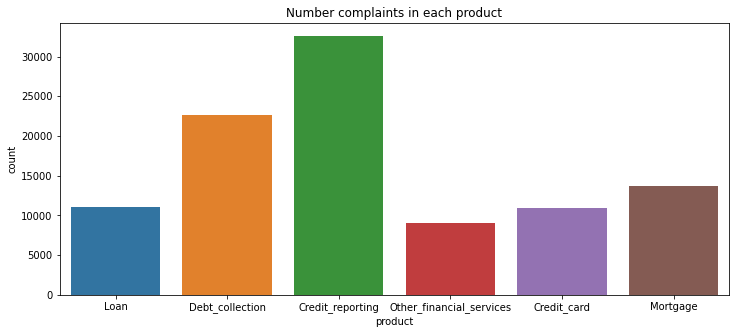

In [13]:
plt.figure(figsize=(12,5))
plt.title('Number complaints in each product')
sns.countplot(data['product'])
plt.show()

In [14]:
data.head()

,product,consumer_complaint_narrative
0,Loan,years account poorly managed forced take defer...
1,Debt_collection,citi management problem contacted stating situ...
2,Credit_reporting,promised several representatives ally financia...
3,Credit_reporting,equifax mishandled information led breach puts...
4,Other_financial_services,false charge bank charged overdraft charges ac...


In [15]:
def print_complaint(index):
  complaint=data[data.index== index][['consumer_complaint_narrative','product']].values[0]
  print(complaint[0])
  print('Product:- ', complaint[1])

In [16]:
print_complaint(10)

opened unsecured line credit synovus bank back converted installment loan balance monthly payment happy pay moving forward sued non compete former employer lost arbitration large amount forced file chapter bankruptcy account included chapter closed charged collect interest chapter canceled made attempts settle debt repayment arrangement agreement account still open rolling days late credit report asked charge close account many times account ruining chance restoring credit accept repayment schedule also asked stop charging daily interest monthly penalties since current balance ridiculous since account closed
Product:-  Credit_reporting


## Cleaning text

In [17]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]'," ",text)
    text = re.sub('[^0-9a-z #+_]'," ",text)
    text = text.replace('x',' ')
    text=' '.join(word for word in text.split() if word not in set(stopwords.words('english')))
    return(text)

In [19]:
%%time
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].apply(clean_text)

CPU times: user 18min 45s, sys: 2min 14s, total: 20min 59s
Wall time: 21min 2s


In [20]:
data.head()

,product,consumer_complaint_narrative
0,Loan,years account poorly managed forced take defer...
1,Debt_collection,citi management problem contacted stating situ...
2,Credit_reporting,promised several representatives ally financia...
3,Credit_reporting,equifa mishandled information led breach puts ...
4,Other_financial_services,false charge bank charged overdraft charges ac...


In [21]:
print_complaint(50)

complaint bank america statement dated stated owed total balance due paid ne statement bank america send charged minimum interest charge even though ending balance actually send statement dated charged account another minimum interest charge interest rate since made purchase bank america saying owe called customer service department ask e planation get fees waived said interest charged arrears argued paid entire balance due date interest charged also charged interest initial hidden interest charge asked fees waived said could waive charges past due amount argued past due amount reason erroneous accounting says hide minimum interest fees also said even paid total amount due today would still owe another interest payment ne month even close account balance owed bank america allow balance days
Product:-  Credit_card


In [22]:
clean_data = data

In [23]:
clean_data.head()

,product,consumer_complaint_narrative
0,Loan,years account poorly managed forced take defer...
1,Debt_collection,citi management problem contacted stating situ...
2,Credit_reporting,promised several representatives ally financia...
3,Credit_reporting,equifa mishandled information led breach puts ...
4,Other_financial_services,false charge bank charged overdraft charges ac...


In [28]:
# data.to_csv(r'/content/drive/MyDrive/datasets/Clean_Complaint_new1.csv')

In [25]:
data['consumer_complaint_narrative'] = data['consumer_complaint_narrative'].str.replace('\d+', '')

In [29]:
data.head()

,product,consumer_complaint_narrative
0,Loan,years account poorly managed forced take defer...
1,Debt_collection,citi management problem contacted stating situ...
2,Credit_reporting,promised several representatives ally financia...
3,Credit_reporting,equifa mishandled information led breach puts ...
4,Other_financial_services,false charge bank charged overdraft charges ac...


In [30]:
data.shape

(99997, 2)

# Creating BOW for keras.

In [31]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [32]:
max_words = 50000

In [33]:
max_sequence_lenght = 250

In [34]:
token= Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [35]:
token.fit_on_texts(data['consumer_complaint_narrative'].values)

In [36]:
word_index=token.word_index

In [39]:
print('Found %s unique tokens.' % len(word_index))

Found 52704 unique tokens.


In [40]:
X = token.texts_to_sequences(data['consumer_complaint_narrative'].values)

In [41]:
X = pad_sequences(X, maxlen=max_sequence_lenght)

In [42]:
print('Shape:', X.shape)

Shape: (99997, 250)


In [43]:
y = pd.get_dummies(data['product']).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (99997, 6)


# Splitting the dataset.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(89997, 250) (89997, 6)
(10000, 250) (10000, 6)


# Building model.

In [46]:
from keras import Sequential
from keras.layers import Dense, SpatialDropout1D, LSTM, Embedding
from keras.callbacks import EarlyStopping

In [47]:
model = Sequential()
model.add(Embedding(max_words,100 , input_length=X.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


Early stopping.

In [48]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=1)

In [49]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32,validation_split=0.3,callbacks=[es])

Epoch 1/3
1969/1969 [==============================] - 2818s 1s/step - loss: 0.9628 - accuracy: 0.6539 - val_loss: 0.7950 - val_accuracy: 0.7291
Epoch 2/3
1969/1969 [==============================] - 2751s 1s/step - loss: 0.6827 - accuracy: 0.7805 - val_loss: 0.5899 - val_accuracy: 0.8167
Epoch 00002: early stopping


In [50]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

313/313 [==============================] - 32s 102ms/step - loss: 0.5937 - accuracy: 0.8147
Test set
  Loss: 0.594
  Accuracy: 0.815


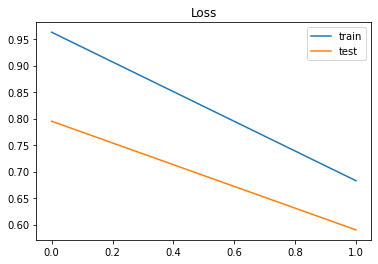

In [51]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

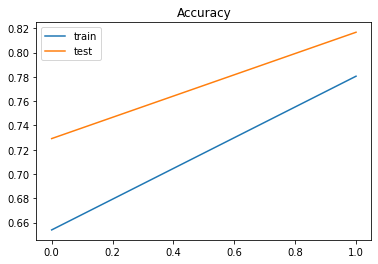

In [52]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [56]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information. With it he opened an account in Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = token.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=250)
pred = model.predict(padded)
labels = ['Credit_card', 'Credit_reporting', 'Debt_collection', 'Mortgage','Loan','Other_financial_service']
print(pred, labels[np.argmax(pred)])

[[0.8961827  0.82763004 0.4165304  0.12200113 0.05835074 0.3741816 ]] Credit_card
